In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Data Processing

In [2]:
df = pd.read_excel('new Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.drop(['customerID'], axis=1,inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

### Null check

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# DataFrame info

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5269.0,0.513570,0.499863,0.00,0.0,1.00,1.0,1.0
SeniorCitizen,5269.0,0.159992,0.366634,0.00,0.0,0.00,0.0,1.0
Partner,5269.0,0.485671,0.499842,0.00,0.0,0.00,1.0,1.0
Dependents,5269.0,0.301006,0.458739,0.00,0.0,0.00,1.0,1.0
tenure,5269.0,32.491365,24.469585,0.00,9.0,29.00,56.0,72.0
PhoneService,5269.0,0.903397,0.295444,0.00,1.0,1.00,1.0,1.0
MultipleLines,5269.0,0.954830,0.949488,0.00,0.0,1.00,2.0,2.0
InternetService,5269.0,0.871133,0.738555,0.00,0.0,1.00,1.0,2.0
OnlineSecurity,5269.0,0.789334,0.859773,0.00,0.0,1.00,2.0,2.0
OnlineBackup,5269.0,0.916493,0.881263,0.00,0.0,1.00,2.0,2.0


# Correlation

In [9]:
relation = df.corr()

<Axes: >

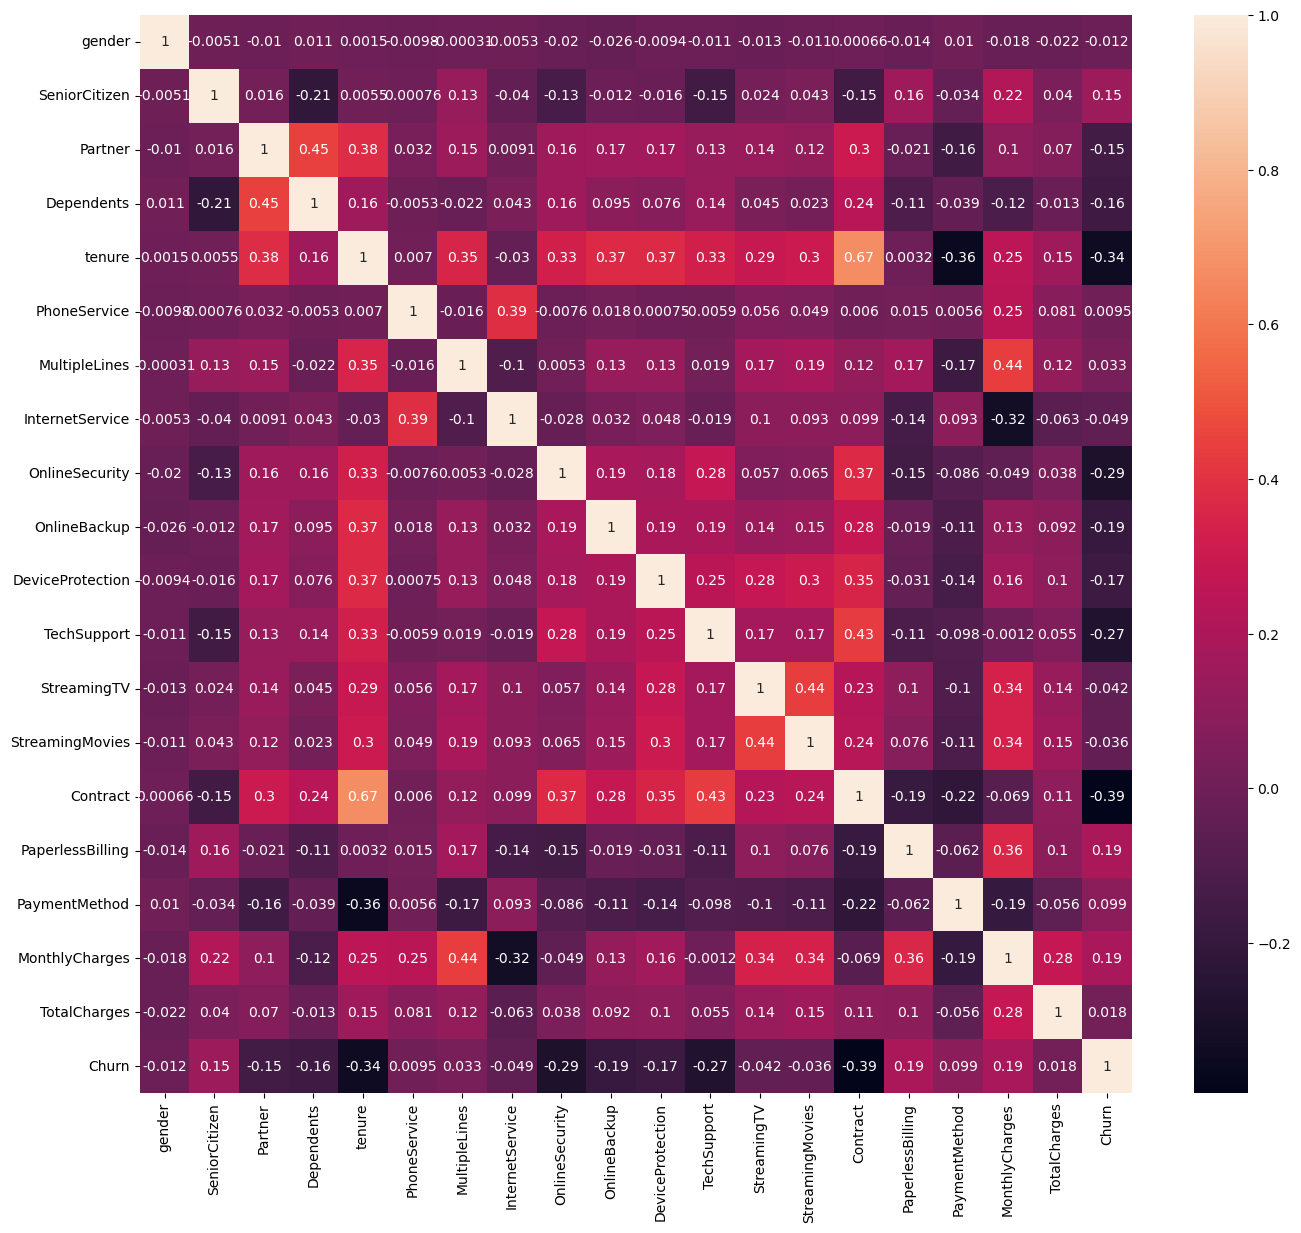

In [10]:
plt.figure(figsize=(16,14))
sns.heatmap(relation, annot=True)

# Churn Rate

In [11]:
df.Churn.value_counts()

Churn
0    3887
1    1382
Name: count, dtype: int64

In [12]:
1382/(3887+1382)

0.26228885936610363

<Axes: xlabel='Churn', ylabel='count'>

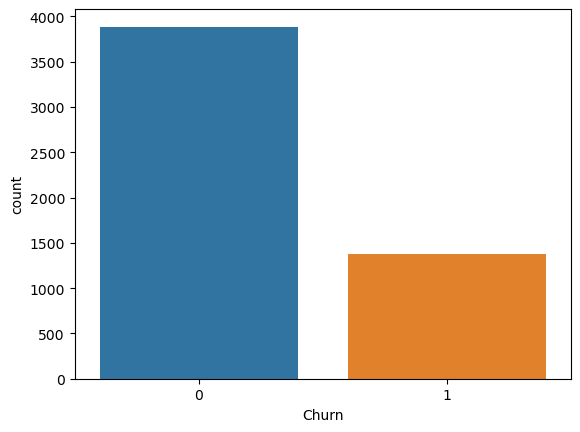

In [13]:
sns.countplot(x='Churn', data=df)

<Axes: xlabel='gender', ylabel='count'>

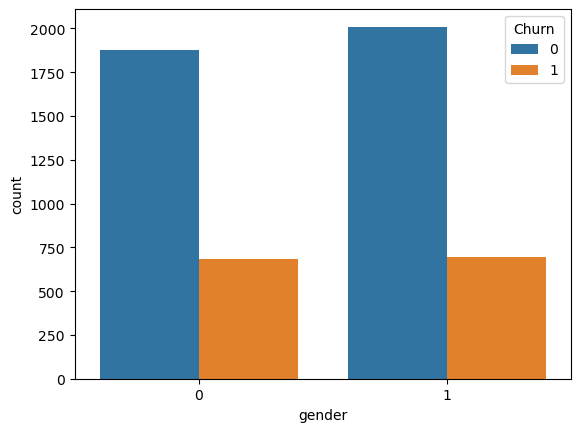

In [14]:
sns.countplot(x='gender',hue='Churn',data=df)

# Resampling

In [15]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [16]:
y.value_counts()

Churn
0    3887
1    1382
Name: count, dtype: int64

In [17]:
def printSmapleCount(Data):
    print(pd.concat([
    pd.Series(y.value_counts(), name='before'),
    pd.Series(Data.value_counts(), name='after')],
    axis=1).reset_index())

## Synthetic Minority Oversampling Technique (SMOTE)

In [18]:
sm = SMOTETomek(random_state=43)

In [19]:
x1,y1 = sm.fit_resample(x,y)

In [20]:
y1.value_counts()

Churn
1    3609
0    3609
Name: count, dtype: int64

## Under sampling

In [21]:
nm = NearMiss()

In [22]:
x2,y2 = nm.fit_resample(x,y)

In [23]:
y2.value_counts()

Churn
0    1382
1    1382
Name: count, dtype: int64

## Over Sampling

In [24]:
osm = RandomOverSampler(random_state=43)

In [25]:
x3,y3 = osm.fit_resample(x,y)

In [26]:
y3.value_counts()

Churn
1    3887
0    3887
Name: count, dtype: int64

# KNN Classifier

## Without sampling

In [27]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.3, random_state=43)

In [28]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(xtrain, ytrain)

KNeighborsClassifier()

In [29]:
knn1.score(xtest,ytest)

0.736875395319418

## After resampling

In [30]:
xtrain1, xtest1, ytrain1, ytest1 = tts(x3, y3, test_size=0.3, random_state=43)

In [31]:
knn2 = KNeighborsClassifier(n_neighbors=4)
knn2.fit(xtrain1, ytrain1)

KNeighborsClassifier(n_neighbors=4)

In [32]:
knn2.score(xtest1,ytest1)

0.755679382768967

# K-Fold Cross Validation

In [33]:
kf = cross_val_score(knn2, x3, y3, cv=KFold())

In [34]:
kf.min(), kf.max(), kf.mean()

(0.6093951093951094, 0.7196141479099678, 0.6893388289529768)

# Stratified K Fold Cross Validation

In [35]:
st = cross_val_score(knn2, x3, y3, cv=StratifiedKFold())

In [36]:
st.min(), st.max(), st.mean()

(0.7209003215434083, 0.7620578778135049, 0.7462067395829454)

# Leave One-Out Cross Validation

In [37]:
le = cross_val_score(knn2, x3, y3, cv=LeaveOneOut())

In [38]:
le.min(), le.max(), le.mean()

(0.0, 1.0, 0.7582968870594289)